# Data Visualisation and Exploratory Data Analysis (EDA)

## Overview
This notebook provides comprehensive data visualisation and exploratory data analysis of the global energy consumption and CO₂ emissions dataset. We'll use multiple visualisation libraries (Matplotlib, Seaborn, and Plotly) to create static and interactive visualisations.

## Learning Objectives
- Master different visualisation techniques for various data types
- Understand when to use static vs interactive visualisations
- Identify patterns, trends, and outliers through visual exploration
- Communicate insights effectively through data visualisation

## Libraries Used
- **Matplotlib**: Static, publication-quality plots
- **Seaborn**: Statistical visualisations with attractive defaults
- **Plotly**: Interactive, web-based visualisations

In [1]:
import sys
print('Python executable:', sys.executable)

Python executable: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis\.venv\Scripts\python.exe


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Load cleaned data

We'll load the cleaned dataset that was prepared in the ETL pipeline.

In [3]:
from pathlib import Path
import os

current_dir = Path.cwd()
parent = current_dir.parent

os.chdir(parent)
current_dir = str(Path.cwd())   # update the variable so future code is consistent
print("New current directory:", current_dir)
processed_file_path = current_dir+'\\dataset\\processed\\cleaned_energy_data.csv'
df = pd.read_csv(processed_file_path)
df.head()

New current directory: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis


,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Energy_category,Energy_balance,CO2_per_capita,Energy_efficiency,Decade,Energy_source_type
0,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188,coal,1.458060,0.000328,353.067318,1980,Fossil Fuel
1,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377,natural gas,0.895822,0.000252,515.562892,1980,Fossil Fuel
2,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565,petroleum,1.047089,0.000571,210.283697,1980,Fossil Fuel
3,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000,nuclear,0.000000,0.000000,3665.787793,1980,Nuclear
4,World,renewables_n_other,1980,20.702344,20.775178,27770.910281,4.298127e+06,68.145921,10.547,0.000000,renewables,0.072834,0.000000,1341.437959,1980,Renewable


In [4]:
# Quick data summary
print("Dataset Summary:")
print(f"- Total records: {len(df):,}")
print(f"- Countries: {df['Country'].nunique()}")
print(f"- Years covered: {df['Year'].min()} - {df['Year'].max()}")
print(f"- Energy categories: {df['Energy_category'].unique()}")
print(f"\nMissing values:")
df.isnull().sum()

Dataset Summary:
- Total records: 46,200
- Countries: 231
- Years covered: 1980 - 2019
- Energy categories: ['coal' 'natural gas' 'petroleum' 'nuclear' 'renewables']

Missing values:


Country                            0
Energy_type                        0
Year                               0
Energy_consumption                 0
Energy_production                  0
GDP                            12845
Population                      7855
Energy_intensity_per_capita        0
Energy_intensity_by_GDP            0
CO2_emission                       0
Energy_category                    0
Energy_balance                     0
CO2_per_capita                     0
Energy_efficiency               3505
Decade                             0
Energy_source_type                 0
dtype: int64

## Matplotlib Visualisations

### Time Series: Global CO₂ Emissions Over Time

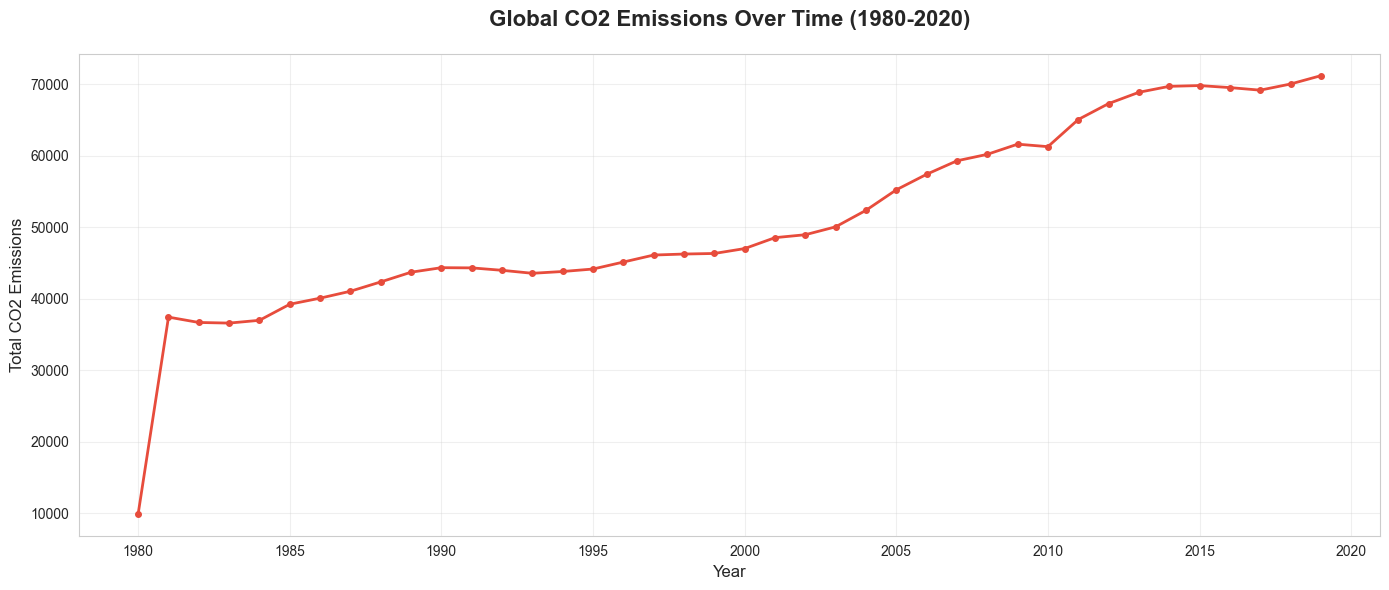

In [5]:
# Aggregate CO2 emissions by year
yearly_co2 = df.groupby('Year')['CO2_emission'].sum()

# Create line plot
plt.figure(figsize=(14, 6))
plt.plot(yearly_co2.index, yearly_co2.values, linewidth=2, color='#e74c3c', marker='o', markersize=4)
plt.title('Global CO2 Emissions Over Time (1980-2020)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()


### Bar Chart: Energy Consumption by Category


📊 Energy Category Distribution:
  petroleum: 36.73%
  coal: 27.59%
  natural gas: 22.02%
  renewables: 8.43%
  nuclear: 5.24%


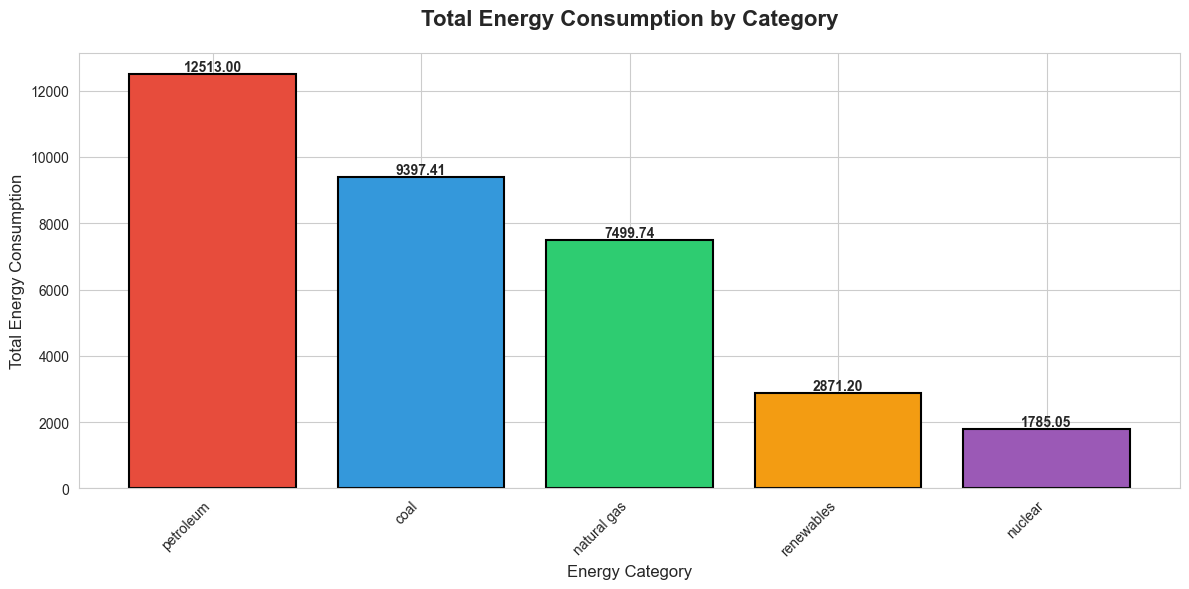

In [6]:
# Aggregate by energy category
category_consumption = df.groupby('Energy_category')['Energy_consumption'].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 6))
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
bars = plt.bar(category_consumption.index, category_consumption.values, color=colors[:len(category_consumption)], 
               edgecolor='black', linewidth=1.5)
plt.title('Total Energy Consumption by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Energy Category', fontsize=12)
plt.ylabel('Total Energy Consumption', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

# Show percentages
print("\n📊 Energy Category Distribution:")
for category, consumption in category_consumption.items():
    pct = (consumption / category_consumption.sum()) * 100
    print(f"  {category}: {pct:.2f}%")

## Seaborn Visualisations

Seaborn builds on Matplotlib and provides a high-level interface for statistical graphics.

### Distribution: GDP Histogram with KDE


📊 GDP Statistics:
  Mean: 827.14
  Median: 47.76
  Std Dev: 5981.72


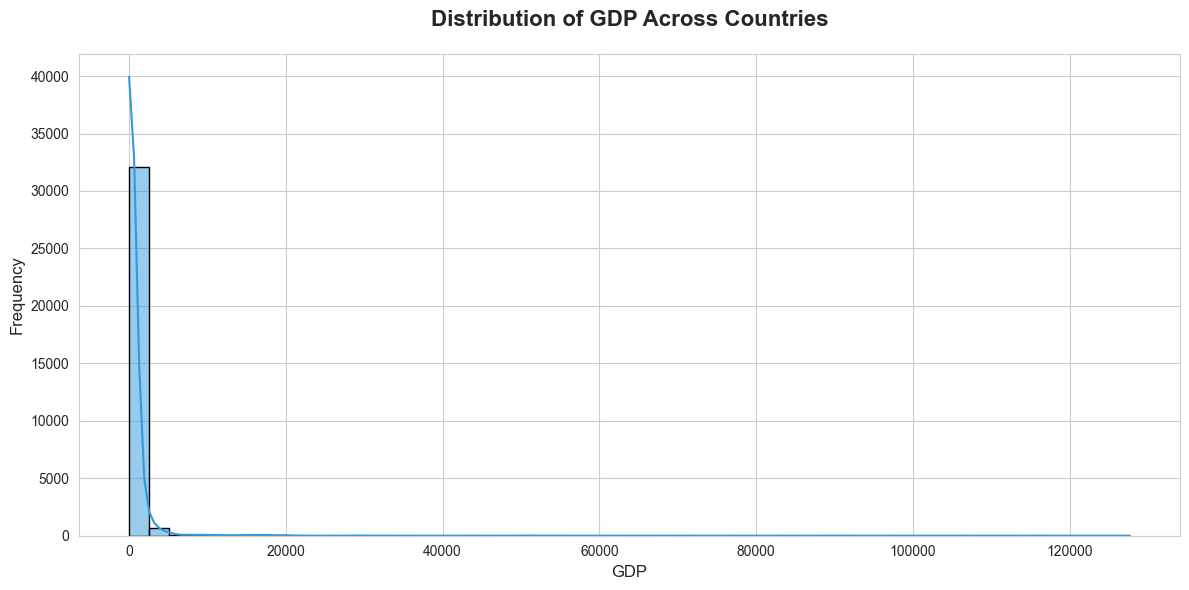

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='GDP', bins=50, kde=True, color='#3498db', edgecolor='black')
plt.title('Distribution of GDP Across Countries', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

print(f"\n📊 GDP Statistics:")
print(f"  Mean: {df['GDP'].mean():.2f}")
print(f"  Median: {df['GDP'].median():.2f}")
print(f"  Std Dev: {df['GDP'].std():.2f}")

### Correlation Heatmap

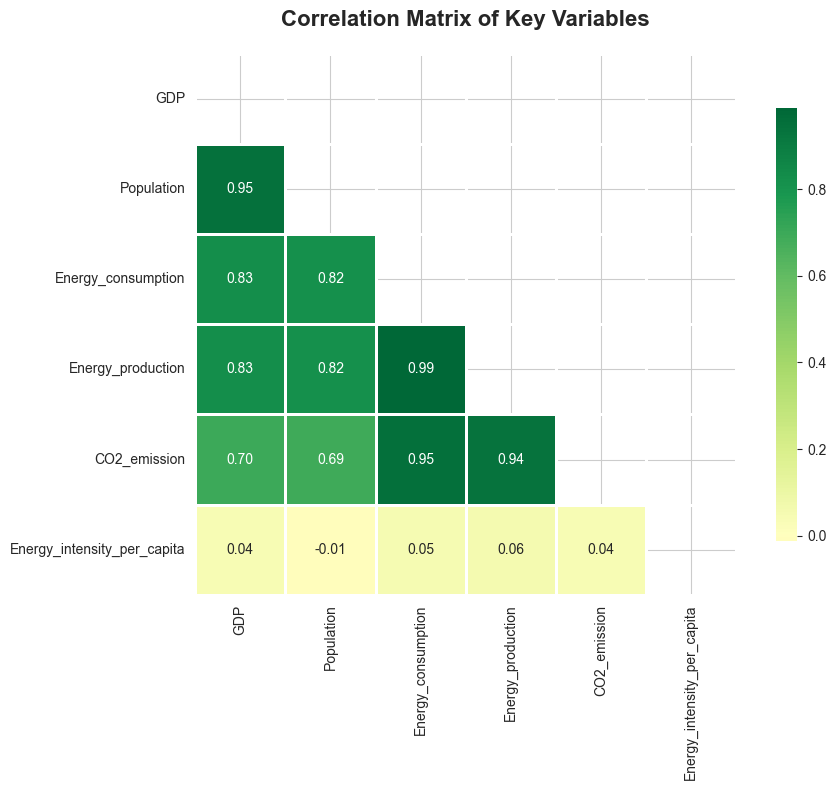

In [8]:
# Select numerical variables for correlation
correlation_vars = ['GDP', 'Population', 'Energy_consumption', 'Energy_production', 
                    'CO2_emission', 'Energy_intensity_per_capita']
corr_matrix = df[correlation_vars].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

In [9]:
print("\n📊 Key Correlations:")
print(f"  GDP vs Energy Consumption: {corr_matrix.loc['GDP', 'Energy_consumption']:.3f}")
print(f"  Population vs Energy Consumption: {corr_matrix.loc['Population', 'Energy_consumption']:.3f}")
print(f"  Energy Consumption vs CO2: {corr_matrix.loc['Energy_consumption', 'CO2_emission']:.3f}")


📊 Key Correlations:
  GDP vs Energy Consumption: 0.831
  Population vs Energy Consumption: 0.820
  Energy Consumption vs CO2: 0.952


### Box Plot: CO₂ Emissions by Energy Category

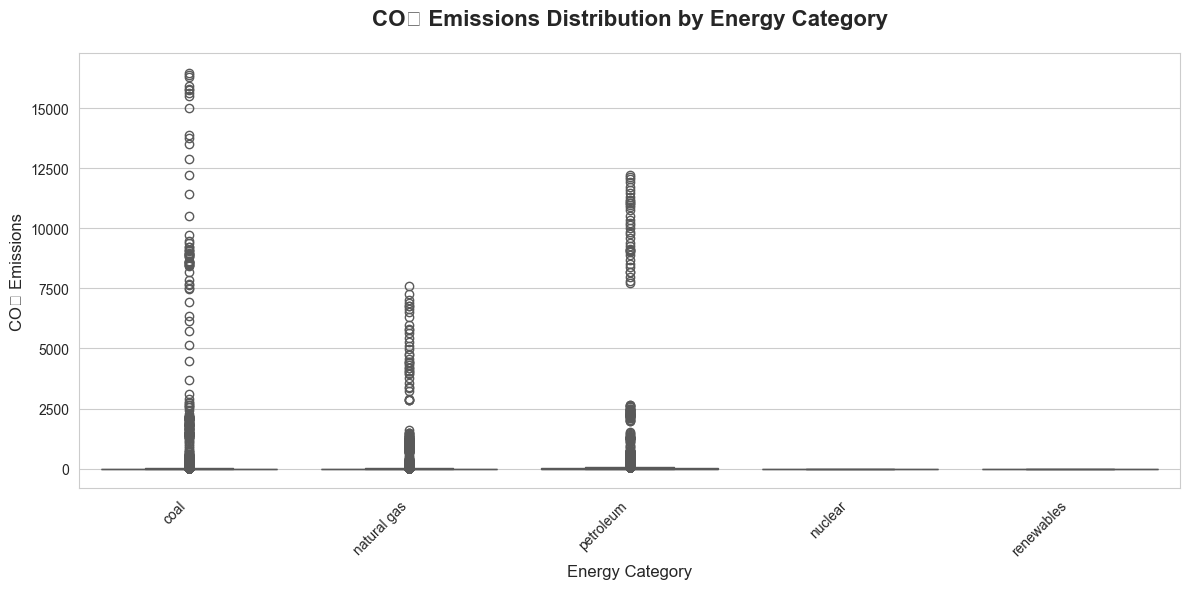

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Energy_category', y='CO2_emission', palette='Set2')
plt.title('CO₂ Emissions Distribution by Energy Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Energy Category', fontsize=12)
plt.ylabel('CO₂ Emissions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Scatter Plot: GDP vs Energy Consumption

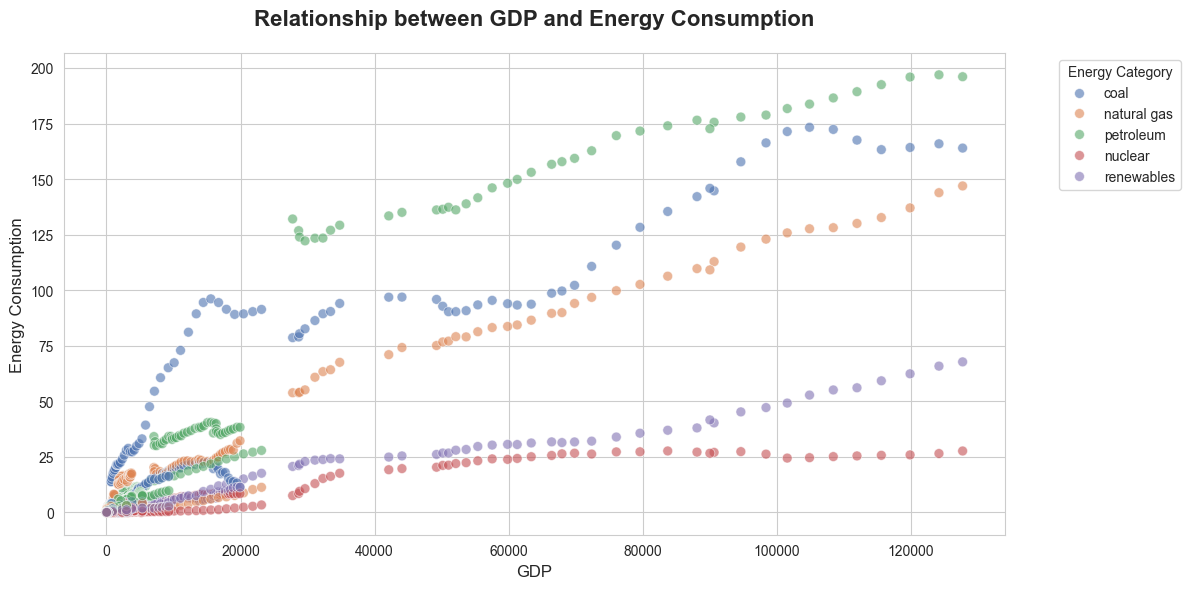

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='GDP', y='Energy_consumption', 
                hue='Energy_category', palette='deep', alpha=0.6, s=50)
plt.title('Relationship between GDP and Energy Consumption', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Energy Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### Violin Plot: Energy Intensity by Decade

Energy_intensity_per_capita - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of capita (capita = individual person), measured (MMBtu/person)

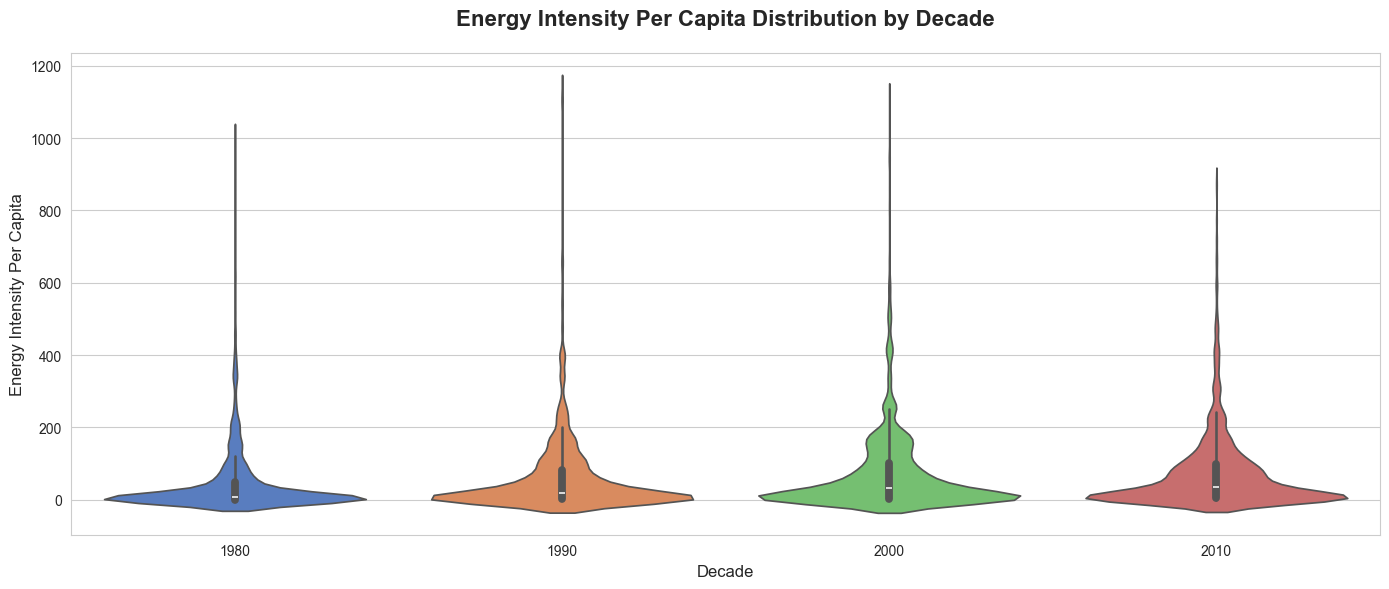

In [12]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='Decade', y='Energy_intensity_per_capita', palette='muted')
plt.title('Energy Intensity Per Capita Distribution by Decade', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Energy Intensity Per Capita', fontsize=12)
plt.tight_layout()

## Plotly Interactive Visualisations

Plotly creates interactive, web-based visualisations that allow users to explore data dynamically.

### Interactive Time Series: Energy Consumption by Category

In [13]:
yearly_category = df.groupby(['Year', 'Energy_category'])['Energy_consumption'].sum().reset_index()
fig = px.line(yearly_category, x='Year', y='Energy_consumption', color='Energy_category',
              title='Energy Consumption by Category Over Time (Interactive)',
              labels={'Energy_consumption': 'Energy Consumption', 'Year': 'Year'},
              color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(
    hovermode='x unified',
    plot_bgcolor='white',
    font=dict(size=12),
    title_font_size=16,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)